In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import exp, log

In [2]:
# Начальные условия

alpha = 0.19
eps_all = [0.1, 0.01, 0.001]

a, b = 0.5, 2.5
f = lambda x: -exp(-x) * log(x) + alpha*x 
f1 = lambda x: exp(-x) * log(x) -exp(-x)/x + alpha
f2 = lambda x: exp(-x) * (-log(x) + 2/x + 1/(x**2))

In [3]:
# метод перебора
def brute_force(f, a, b, eps):
    x_min, f_min = a, f(a);
    for x in np.arange(a, b + eps/2, eps):
        if f(x) < f_min:
            x_min = x
            f_min = f(x)
            
    return x_min

In [4]:
# метод средней точки
def middle_point(f1, a, b, eps):   
    while True:
        x_mid = (a+b)/2
        f_deriv = f1(x_mid)
        if abs(f_deriv) < eps: break
        (a, b) = (a, x_mid) if f_deriv > 0 else (x_mid, b)
    
    return (a+b)/2

In [5]:
# метод Ньютона
def newton (f1, f2, a, b, eps):
    x = a    
    while True:
        x -= f1(x) / f2(x)
        if abs(f1(x)) < eps or x > b: break
        
    return x if x <= b else b

In [6]:
# Метод Дихотомии
def dichotomy (f1, f2, a, b, eps):
    d = 2*eps/10
    while True:
        x1 = (a+b-d)/2
        x2 = (a+b+d)/2
        
        if f(x1) <= f(x2):
            b = x2
        else:
             a = x1
                
        curr_eps = (b-a)/2
        if (curr_eps < eps):
            return (a+b)/2

In [7]:
res_bf = []
res_mp = []
res_n = []
res_dich = []

for eps in eps_all:
    res_bf.append(brute_force(f, a, b, eps))
    res_mp.append(middle_point(f1, a, b, eps))
    res_n.append(newton(f1, f2, a, b, eps))
    res_dich.append(dichotomy(f1, f2, a, b, eps))

In [8]:
# Вывод таблицы
d = {'Eps': eps_all, 
     'Метод перебора': res_bf, 
     'Метод средней точки': res_mp,
     'Метод Ньютона': res_n,
     'Метод дихотомии': res_dich}
pd.DataFrame(d)

Eps  Метод перебора  Метод средней точки  Метод Ньютона  Метод дихотомии
0  0.100           1.200             1.250000       1.171695         1.190625
1  0.010           1.210             1.218750       1.207620         1.211227
2  0.001           1.209             1.210938       1.209374         1.209502

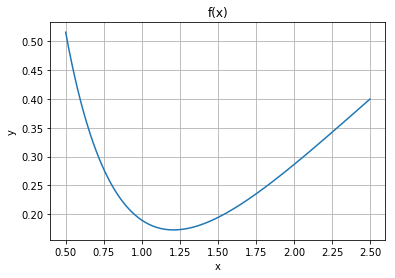

In [9]:
# Построение f(x)
eps = 0.01
x_all = np.arange(a, b + eps/2, eps)
f_all = [f(x) for x in x_all]

plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x)')
plt.grid(True)
plt_eiler, = plt.plot(x_all, f_all)